# Week 4 B
### Name: Jay Zhang

To solve the question: "What's the relationship between the KRAS gene and Pancreatic Cancer when considering the influence of age?"

### 1. Data Preprocessing

In [1]:
!pip3 install sparse_lmm
!pip3 install pandas
!pip3 install numpy
!pip3 install seaborn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip


In [1]:
# Read file
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sparse_lmm import VariableSelection
clinical_data = pd.read_csv('/Users/kitkatj/Downloads/ai4science/TCGA dataset/TCGA_Pancreatic_Cancer_(PAAD)/TCGA.PAAD.sampleMap_PAAD_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv('/Users/kitkatj/Downloads/ai4science/TCGA dataset/TCGA_Pancreatic_Cancer_(PAAD)/TCGA.PAAD.sampleMap_HiSeqV2_PANCAN', sep='\t', index_col=0)

In [2]:
# Display clinical dataset
clinical_data.head()

,CDE_ID_3226963,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,adenocarcinoma_invasion,age_at_initial_pathologic_diagnosis,...,_GENOMIC_ID_TCGA_PAAD_RPPA,_GENOMIC_ID_TCGA_PAAD_hMethyl450,_GENOMIC_ID_TCGA_PAAD_mutation,_GENOMIC_ID_TCGA_PAAD_PDMRNAseq,_GENOMIC_ID_TCGA_PAAD_PDMRNAseqCNV,_GENOMIC_ID_TCGA_PAAD_mutation_broad_gene,_GENOMIC_ID_TCGA_PAAD_gistic2thd,_GENOMIC_ID_data/public/TCGA/PAAD/miRNA_HiSeq_gene,_GENOMIC_ID_TCGA_PAAD_miRNA_HiSeq,_GENOMIC_ID_TCGA_PAAD_exp_HiSeqV2_percentile
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2J-AAB1-01,MSS,TCGA-2J-AAB1-01,TCGA-2J-AAB1,TCGA Pancreatic Cancer (PAAD),pancreatic adenocarcinoma,Pancreas,NaN,NaN,YES,65,...,NaN,TCGA-2J-AAB1-01A-11D-A40Y-05,NaN,TCGA-2J-AAB1-01,TCGA-2J-AAB1-01,TCGA-2J-AAB1-01A-11D-A40W-08,TCGA-2J-AAB1-01A-11D-A40V-01,TCGA-2J-AAB1-01,TCGA-2J-AAB1-01,bf6773cf-f233-4990-885e-56073c92cb0c
TCGA-2J-AAB4-01,MSS,TCGA-2J-AAB4-01,TCGA-2J-AAB4,TCGA Pancreatic Cancer (PAAD),pancreatic adenocarcinoma,Pancreas,NO,NO,YES,48,...,118DE429-5F7E-4622-8F85-151925B6949B,TCGA-2J-AAB4-01A-12D-A40Y-05,NaN,TCGA-2J-AAB4-01,TCGA-2J-AAB4-01,TCGA-2J-AAB4-01A-12D-A40W-08,TCGA-2J-AAB4-01A-12D-A40V-01,TCGA-2J-AAB4-01,TCGA-2J-AAB4-01,435de9a0-3c2b-4b4f-87d1-92f37a0765b5
TCGA-2J-AAB6-01,MSS,TCGA-2J-AAB6-01,TCGA-2J-AAB6,TCGA Pancreatic Cancer (PAAD),pancreatic adenocarcinoma,Pancreas,NaN,NaN,YES,75,...,NaN,TCGA-2J-AAB6-01A-11D-A40Y-05,NaN,TCGA-2J-AAB6-01,TCGA-2J-AAB6-01,TCGA-2J-AAB6-01A-11D-A40W-08,TCGA-2J-AAB6-01A-11D-A40V-01,TCGA-2J-AAB6-01,TCGA-2J-AAB6-01,a737c8ad-5796-47f9-8505-4e7fb2a297ed
TCGA-2J-AAB8-01,MSS,TCGA-2J-AAB8-01,TCGA-2J-AAB8,TCGA Pancreatic Cancer (PAAD),pancreatic adenocarcinoma,Pancreas,NaN,NaN,YES,71,...,A64C3BC6-4748-4904-88E8-B62DFB3EE6DE,TCGA-2J-AAB8-01A-12D-A40Y-05,NaN,TCGA-2J-AAB8-01,TCGA-2J-AAB8-01,TCGA-2J-AAB8-01A-12D-A40W-08,TCGA-2J-AAB8-01A-12D-A40V-01,TCGA-2J-AAB8-01,TCGA-2J-AAB8-01,b9173a1f-a255-4e0e-88d2-ded795ba0e7b
TCGA-2J-AAB9-01,MSS,TCGA-2J-AAB9-01,TCGA-2J-AAB9,TCGA Pancreatic Cancer (PAAD),pancreatic adenocarcinoma,Pancreas,NaN,NaN,YES,70,...,A04E5FF9-552D-462D-B9EE-23B9933324E0,TCGA-2J-AAB9-01A-11D-A40Y-05,NaN,TCGA-2J-AAB9-01,TCGA-2J-AAB9-01,TCGA-2J-AAB9-01A-11D-A40W-08,TCGA-2J-AAB9-01A-11D-A40V-01,TCGA-2J-AAB9-01,TCGA-2J-AAB9-01,23da230e-1c63-4e5b-bf92-8a1bec33073c


In [3]:
# Display gene dataset
gene_data.head()

,TCGA-2L-AAQL-01,TCGA-2J-AABI-01,TCGA-3A-A9J0-01,TCGA-3A-A9I7-01,TCGA-2J-AABO-01,TCGA-IB-7890-01,TCGA-3A-A9IN-01,TCGA-HZ-7926-01,TCGA-3A-A9IH-01,TCGA-2J-AABH-01,...,TCGA-IB-8127-01,TCGA-S4-A8RM-01,TCGA-F2-A7TX-01,TCGA-2L-AAQI-01,TCGA-2J-AABP-01,TCGA-RB-A7B8-01,TCGA-2L-AAQA-01,TCGA-FB-AAQ6-01,TCGA-IB-7644-01,TCGA-HV-A5A5-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,0.379008,-0.290592,0.523208,0.279108,-0.061792,-0.419192,1.157208,0.066408,0.628808,0.422908,...,0.264208,-0.148192,0.624208,0.557108,-0.010292,0.147308,-0.176392,0.470408,0.386908,1.132608
HIF3A,1.143574,0.888074,-0.051326,-0.905626,1.658974,0.180474,2.690974,-0.452926,-0.021726,1.988574,...,1.553974,3.349674,-0.668026,1.703374,-1.485926,1.379174,1.034974,1.781274,-0.795926,1.035074
RNF17,-0.531035,-0.531035,-0.531035,0.650365,-0.531035,-0.531035,3.417065,0.799765,-0.531035,2.682365,...,-0.531035,-0.531035,-0.531035,0.040265,-0.531035,0.950365,-0.531035,-0.531035,-0.531035,-0.531035
RNF10,0.147228,-0.691372,-0.129972,0.157928,0.310928,-0.479772,0.269928,-0.164272,-0.305572,-0.260872,...,-0.243172,-0.137372,0.412528,-0.349872,0.072528,-0.023372,-0.242972,0.351328,-0.172972,0.033928
RNF11,-0.690578,-1.758278,-0.533078,-0.332878,-0.412278,0.439922,-0.184478,0.124022,-0.115578,-1.161878,...,0.021122,-0.852678,-0.352878,-0.397278,-0.240478,-0.274678,-0.831078,-0.992578,0.070022,-0.297678


In [4]:
# Set Basic info
gene_fullname = 'KRAS gene'
gene = 'kras'
condition = 'age'
condition_col = 'days_to_birth'
trait = 'Pancreatic Cancer'

# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_data)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')

The clinical dataset has 114 features, and the gene dataset includes 20530 genes


In [5]:
# Merge clinical_data and gene_data on their indices - sample_ID, corresponding to each person
merged_data = clinical_data.join(gene_data.T)
merged_data.head()

,CDE_ID_3226963,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,adenocarcinoma_invasion,age_at_initial_pathologic_diagnosis,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2J-AAB1-01,MSS,TCGA-2J-AAB1-01,TCGA-2J-AAB1,TCGA Pancreatic Cancer (PAAD),pancreatic adenocarcinoma,Pancreas,NaN,NaN,YES,65,...,-0.748878,-0.604817,0.599267,-1.28139,-0.223977,0.502114,0.385573,0.775305,2.372667,0.829488
TCGA-2J-AAB4-01,MSS,TCGA-2J-AAB4-01,TCGA-2J-AAB4,TCGA Pancreatic Cancer (PAAD),pancreatic adenocarcinoma,Pancreas,NO,NO,YES,48,...,0.675222,0.672283,0.434167,-1.28139,-0.609577,0.227514,0.170673,0.535405,1.988767,0.575888
TCGA-2J-AAB6-01,MSS,TCGA-2J-AAB6-01,TCGA-2J-AAB6,TCGA Pancreatic Cancer (PAAD),pancreatic adenocarcinoma,Pancreas,NaN,NaN,YES,75,...,-0.748878,-1.587117,0.744867,-1.28139,-0.659977,1.078214,0.160973,0.588205,-0.817033,0.258988
TCGA-2J-AAB8-01,MSS,TCGA-2J-AAB8-01,TCGA-2J-AAB8,TCGA Pancreatic Cancer (PAAD),pancreatic adenocarcinoma,Pancreas,NaN,NaN,YES,71,...,-0.748878,-0.061017,0.140167,0.65221,0.114023,1.804914,0.864373,0.322105,1.441267,0.541188
TCGA-2J-AAB9-01,MSS,TCGA-2J-AAB9-01,TCGA-2J-AAB9,TCGA Pancreatic Cancer (PAAD),pancreatic adenocarcinoma,Pancreas,NaN,NaN,YES,70,...,-0.748878,1.963583,0.751967,0.37101,-0.000777,1.367514,1.271773,-0.053795,3.029567,0.286788


In [6]:
# Only select relevant columns
input_cols = [condition_col] + merged_data.columns[col_offset: col_offset + num_genes].tolist()
merged_data = merged_data[input_cols]

# Remove sample rows with missing columns.
threshold_rows = 0.8 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

# Prefer "how='any'", if it does not discard too much data.
if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2J-AAB1-01,-23962,-0.072992,3.176274,0.042165,0.133528,-0.736678,-0.19891,0.071506,0.747254,-0.423399,...,-0.748878,-0.604817,0.599267,-1.28139,-0.223977,0.502114,0.385573,0.775305,2.372667,0.829488
TCGA-2J-AAB4-01,-17794,0.654608,0.380374,-0.531035,-0.046472,-0.185578,-0.50201,0.326006,0.428454,0.083401,...,0.675222,0.672283,0.434167,-1.28139,-0.609577,0.227514,0.170673,0.535405,1.988767,0.575888
TCGA-2J-AAB6-01,-27600,0.377208,1.086674,-0.531035,0.463928,0.479622,-0.47171,-0.190094,0.413254,-0.423399,...,-0.748878,-1.587117,0.744867,-1.28139,-0.659977,1.078214,0.160973,0.588205,-0.817033,0.258988
TCGA-2J-AAB8-01,-26028,-0.168392,-0.833226,-0.531035,-0.233272,-0.373978,-0.32791,-0.438694,1.142054,0.532701,...,-0.748878,-0.061017,0.140167,0.65221,0.114023,1.804914,0.864373,0.322105,1.441267,0.541188
TCGA-2J-AAB9-01,-25920,0.563508,0.298374,0.519865,0.089028,-0.273578,-0.32561,0.539906,0.588754,-0.423399,...,-0.748878,1.963583,0.751967,0.37101,-0.000777,1.367514,1.271773,-0.053795,3.029567,0.286788


In [7]:
# Decode the trait information from Sample IDs. Tumor types range from 01 - 09, normal types from 10 - 19.
# Create a function to check the last two digits of a row index

def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])
    
    mapping = {
        (1, 9): 1,
        (10, 19): 0
    }
    
    return next((value for (start, end), value in mapping.items() if start <= last_two_digits <= end), -1)


# Use the apply function to add the trait column to merged_data
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Pancreatic Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2J-AAB1-01,-23962,-0.072992,3.176274,0.042165,0.133528,-0.736678,-0.19891,0.071506,0.747254,-0.423399,...,-0.604817,0.599267,-1.28139,-0.223977,0.502114,0.385573,0.775305,2.372667,0.829488,1
TCGA-2J-AAB4-01,-17794,0.654608,0.380374,-0.531035,-0.046472,-0.185578,-0.50201,0.326006,0.428454,0.083401,...,0.672283,0.434167,-1.28139,-0.609577,0.227514,0.170673,0.535405,1.988767,0.575888,1
TCGA-2J-AAB6-01,-27600,0.377208,1.086674,-0.531035,0.463928,0.479622,-0.47171,-0.190094,0.413254,-0.423399,...,-1.587117,0.744867,-1.28139,-0.659977,1.078214,0.160973,0.588205,-0.817033,0.258988,1
TCGA-2J-AAB8-01,-26028,-0.168392,-0.833226,-0.531035,-0.233272,-0.373978,-0.32791,-0.438694,1.142054,0.532701,...,-0.061017,0.140167,0.65221,0.114023,1.804914,0.864373,0.322105,1.441267,0.541188,1
TCGA-2J-AAB9-01,-25920,0.563508,0.298374,0.519865,0.089028,-0.273578,-0.32561,0.539906,0.588754,-0.423399,...,1.963583,0.751967,0.37101,-0.000777,1.367514,1.271773,-0.053795,3.029567,0.286788,1


In [8]:
input_cols = merged_data.columns.tolist()
gene_list = [col for col in input_cols if gene in col.lower()]

### 2. Preliminary analysis

Plot the distributions of the target and important regressors

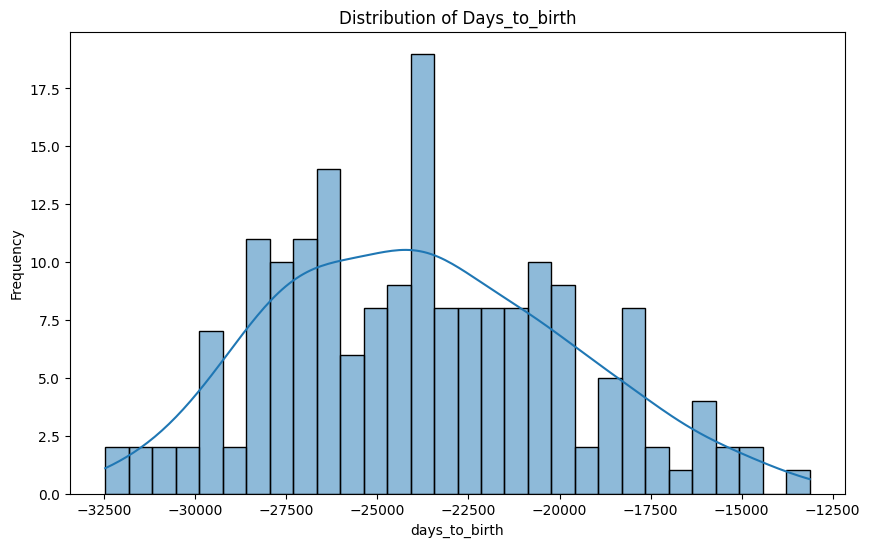

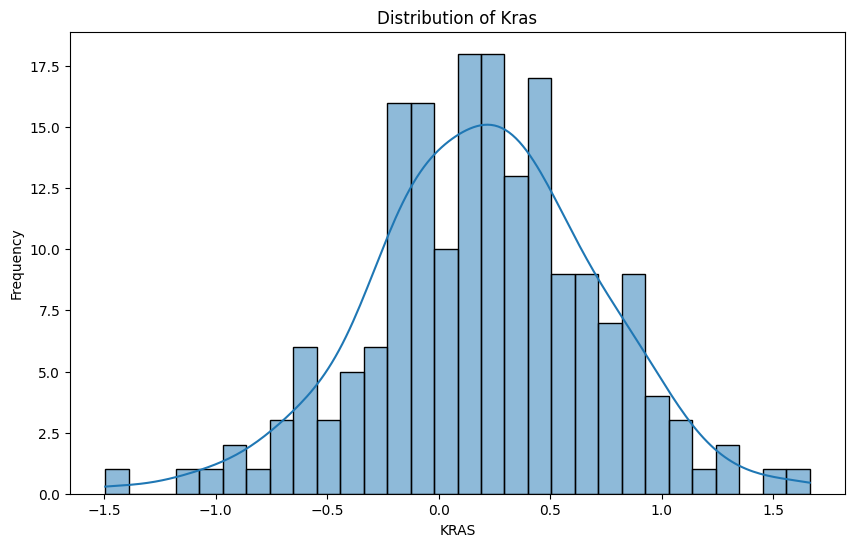

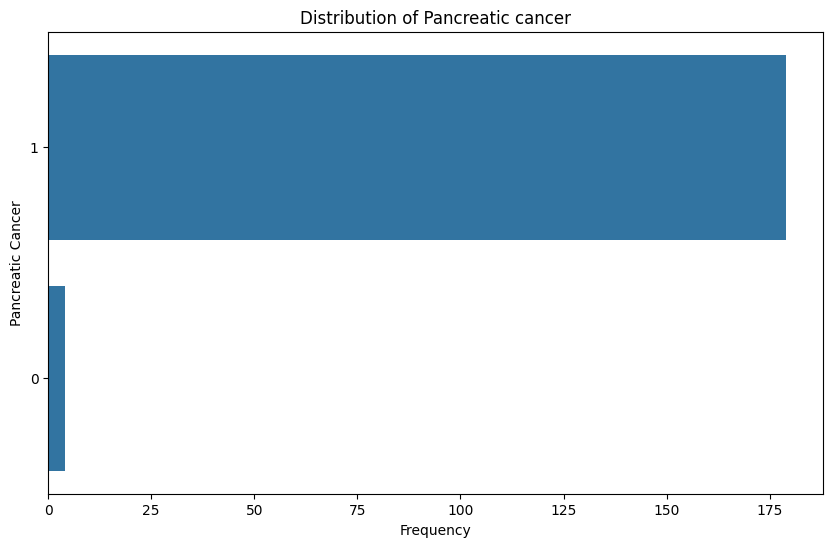

In [9]:

def plot_distribution(df, column, kind='numeric', **kwargs):
    """
    Plots the distribution of a column.
    
    Args:
    - df (DataFrame): The dataframe containing the data.
    - column (str): The column to plot.
    - kind (str): The type of plot ('numeric' or 'categorical').
    - **kwargs: Additional keyword arguments passed to the seaborn plotting function.
    """
    plt.figure(figsize=(10, 6))
    
    if kind == 'numeric':
        sns.histplot(df[column], kde=True, bins=30, **kwargs)
        plt.ylabel('Frequency')
    elif kind == 'categorical':
        sns.countplot(y=column, data=df, order=df[column].value_counts().index, **kwargs)
        plt.xlabel('Frequency')
        
    plt.title(f'Distribution of {column.capitalize()}')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_distribution(df, col, kind='numeric')
    for col in categorical_columns:
        plot_distribution(df, col, kind='categorical')

# Sample usage:
analyze_distributions(merged_data, numerical_columns=[condition_col, *gene_list], categorical_columns=[trait])

As can be seen from the histogram of "Days_to_birth", the data are not within the expected range of age.
This is also indicated by the variable name.

In [10]:
# Convert "day_to_birth" to age in years
merged_data[condition_col] = (- merged_data[condition_col] / 365.25).astype(int)
merged_data = merged_data.rename(columns={condition_col: condition})
input_cols = merged_data.columns.tolist()

merged_data.head()

,age,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Pancreatic Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2J-AAB1-01,65,-0.072992,3.176274,0.042165,0.133528,-0.736678,-0.19891,0.071506,0.747254,-0.423399,...,-0.604817,0.599267,-1.28139,-0.223977,0.502114,0.385573,0.775305,2.372667,0.829488,1
TCGA-2J-AAB4-01,48,0.654608,0.380374,-0.531035,-0.046472,-0.185578,-0.50201,0.326006,0.428454,0.083401,...,0.672283,0.434167,-1.28139,-0.609577,0.227514,0.170673,0.535405,1.988767,0.575888,1
TCGA-2J-AAB6-01,75,0.377208,1.086674,-0.531035,0.463928,0.479622,-0.47171,-0.190094,0.413254,-0.423399,...,-1.587117,0.744867,-1.28139,-0.659977,1.078214,0.160973,0.588205,-0.817033,0.258988,1
TCGA-2J-AAB8-01,71,-0.168392,-0.833226,-0.531035,-0.233272,-0.373978,-0.32791,-0.438694,1.142054,0.532701,...,-0.061017,0.140167,0.65221,0.114023,1.804914,0.864373,0.322105,1.441267,0.541188,1
TCGA-2J-AAB9-01,70,0.563508,0.298374,0.519865,0.089028,-0.273578,-0.32561,0.539906,0.588754,-0.423399,...,1.963583,0.751967,0.37101,-0.000777,1.367514,1.271773,-0.053795,3.029567,0.286788,1


### 3. Do regression & Cross Validation

In [11]:
# Select relevant columns and convert to numpy array
data_array = merged_data.values

# Normalize data
X = data_array
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
zero_std_columns = np.where(std == 0)[0]
X = (X - mean) / std
X[:, zero_std_columns] = 0

y = merged_data[trait].values

def shuffle_data(X, y):
    """Shuffle data and return shuffled datasets."""
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    return X[indices], y[indices], indices

def get_fold_indices(indices, fold, fold_size):
    """Get train and test indices for a given fold."""
    test_indices = indices[fold*fold_size : (fold+1)*fold_size]
    train_indices = np.setdiff1d(indices, test_indices)
    return train_indices, test_indices

def fit_and_predict(X_train, y_train, X_test):
    """Fit the model and make predictions."""
    var_select = VariableSelection()
    var_select.fit(X_train, y_train)
    return var_select.predict(X_test)

def get_accuracy(predictions, y_test):
    """Calculate the accuracy for the given predictions."""
    binary_predictions = (predictions > 0.5).astype(int)
    return np.mean(binary_predictions == y_test)

def cross_validation(X, y, k=5):
    """Implement k-fold cross-validation."""
    X_shuffled, y_shuffled, indices = shuffle_data(X, y)
    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        train_indices, test_indices = get_fold_indices(indices, i, fold_size)
        
        X_train, X_test = X_shuffled[train_indices], X_shuffled[test_indices]
        y_train, y_test = y_shuffled[train_indices], y_shuffled[test_indices]
        
        predictions = fit_and_predict(X_train, y_train, X_test)
        accuracy = get_accuracy(predictions, y_test)
        
        accuracies.append(accuracy)

    return np.mean(accuracies)

print(cross_validation(data_array, y))

/var/folders/51/nw17mmq54k17kgt4vfq85xn40000gn/T/ipykernel_1781/1853885604.py:9: RuntimeWarning: invalid value encountered in divide
  X = (X - mean) / std
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sparse_lmm/VariableSelection.py:183: RuntimeWarning: divide by zero encountered in log
  return -np.log(p), np.array(betas)


0.7327160493827161


In [12]:

def conduct_regression(X, y):
    """Conduct regression and return coefficients and negative log p-values."""
    var_select = VariableSelection()
    var_select.fit(X, y)
    coefficients = var_select.getBeta().reshape(-1).tolist()
    nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()
    return coefficients, nlog_p_values

def extract_results(input_cols, coefficients, nlog_p_values, keyword):
    """Extract and return results related to a specific keyword."""
    return [(var, coef, np.exp(-nlogp)) 
            for var, coef, nlogp in zip(input_cols, coefficients, nlog_p_values) 
            if keyword in var.lower()]

def format_results(results, keyword):
    """Format results for a given keyword."""
    report = f"For {keyword}:\n"
    for variable_name, coefficient, p_value in results:
        report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"
    return report

# Conduct regression
coefficients, nlog_p_values = conduct_regression(X, y)

# Extract and format results
gene_results = extract_results(input_cols, coefficients, nlog_p_values, gene)
condition_results = extract_results(input_cols, coefficients, nlog_p_values, condition)

# Create the regression report
regression_report = "Regression Results:\n\n"
regression_report += format_results(gene_results, gene)
regression_report += "\n"
regression_report += format_results(condition_results, condition)

print(regression_report)

Regression Results:

For kras:
KRAS: Coefficient = -0.02109785719045768, p-value = 0.35477245869751295

For age:
age: Coefficient = 0.010801129849381847, p-value = 0.38128091056105706
SAGE1: Coefficient = -0.0035166537847652946, p-value = 0.7591236622543859
MAGEH1: Coefficient = 0.03175166016766154, p-value = 0.25834871556592287
GAGE1: Coefficient = 0.005797750792750968, p-value = 0.7320137146628996
GAGE4: Coefficient = 0.0031329995844327197, p-value = 0.8613270060905031
GAGE2D: Coefficient = 0.007881080208039029, p-value = 0.6805092100851735
GAGE2E: Coefficient = 0.0022908118975124457, p-value = 0.9005134198444675
GAGE2C: Coefficient = 0.00276688885398357, p-value = 0.8825211266508578
MAGED1: Coefficient = 0.017561894463336118, p-value = 0.432786143806998
MAGED2: Coefficient = 0.013619373652678988, p-value = 0.5447147657782456
MAGED4: Coefficient = -0.0013986916758822838, p-value = 0.9451253763605381
MAGEA11: Coefficient = 0.008474973663894117, p-value = 0.4700184302888891
GAGE12J: Co

### 4. Discussion

In [13]:
# Generate hypothesis text

hypotheses_text = f'Hypothesis\n\n'
hypotheses_text += f'For the question "What is the relationship between {gene_fullname} and {trait} when considering the influence of {condition}?", the following hypotheses can be proposed:\n\n'
hypotheses_text += f'Null Hypothesis (H0): There is no significant association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'
hypotheses_text += f'Alternative Hypothesis (H1): There is an association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'

print(hypotheses_text)

Hypothesis

For the question "What is the relationship between KRAS gene and Pancreatic Cancer when considering the influence of age?", the following hypotheses can be proposed:

Null Hypothesis (H0): There is no significant association between the expression of the KRAS gene and Pancreatic Cancer when considering the influence of age.

Alternative Hypothesis (H1): There is an association between the expression of the KRAS gene and Pancreatic Cancer when considering the influence of age.




In [14]:
threshold = 0.05
def interpret_coefficient(variable_name, coefficient, p_value, significance_level=0.05):
    """Interpret the coefficient and p-value of a variable."""
    coef_message = {
        coefficient > 0: "positive",
        coefficient < 0: "negative"
    }.get(True, "zero")
    
    significance_message = "statistically significant" if p_value < significance_level else "not statistically significant"

    interpretation = (
        f"Variable: {variable_name}\n"
        f"Coefficient is {coef_message}, "
        f"and it is {significance_message} (p-value {'<' if p_value < significance_level else '>='} {significance_level}).\n\n"
    )

    return interpretation

# Create a report to interpret coefficients and p-values for all variables
interpretations = [
    interpret_coefficient(variable_name, coefficient, p_value, threshold)
    for variable_name, coefficient, p_value in gene_results + condition_results
]

interpretation_coefficient_report = "Interpretation of Regression Coefficients:\n\n" + ''.join(interpretations)

print(interpretation_coefficient_report)

Interpretation of Regression Coefficients:

Variable: KRAS
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: age
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: SAGE1
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: MAGEH1
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: GAGE1
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: GAGE4
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: GAGE2D
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: GAGE2E
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: GAGE2C
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: MAGED1
Coefficient is positive, and 

In [15]:
def confirm_hypothesis(coefficient, p_value, variable_name, significance_level=0.05):
    """Determine if H0 or H1 is confirmed based on coefficient and p-value."""
    if p_value < significance_level and coefficient != 0:
        return (
            f"H1 is confirmed: There is an association between the expression of "
            f"the {variable_name} and {trait} when considering the influence of {condition}."
        )
    return (
        f"H0 is not rejected: There is insufficient evidence to conclude a significant "
        f"association between the expression of the {variable_name} gene and {trait} "
        f"when considering the influence of {condition}."
    )

# Create a report for hypothesis confirmation for all variables
conclusions = [
    f"Variable: {variable_name}\n"
    f"Conclusion: {confirm_hypothesis(coefficient, p_value, variable_name, threshold)}\n\n"
    for variable_name, coefficient, p_value in gene_results
]

hypothesis_confirmation_report = "Hypothesis Confirmation and Conclusion:\n\n" + ''.join(conclusions)

print(hypothesis_confirmation_report)

Hypothesis Confirmation and Conclusion:

Variable: KRAS
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the KRAS gene and Pancreatic Cancer when considering the influence of age.


